<a href="https://colab.research.google.com/github/darshan-analytics/tweeter_data_analyzer/blob/master/kappa_score_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd

In [134]:
df = pd.read_csv('Vader_labled_data_first100.csv')

In [135]:
df

,Unnamed: 0,tweetid,created_at,user_name,text,favourite_count,retweet_count,location,hashtags,Vader_scores,sentiment,Aditya_Sentiment,Darshan_Sentiment,Sahil_Sentiment
0,0,1.300000e+18,9/10/20 23:55,mistytaka,b'RT Anon decoder Libertards getting destroyed...,0,31,Zimbabwe,Qanon Maga Tesla Trump Trump2020 Trump2020Land...,-0.4939,neutral,neutral,neutral,neutral
1,1,1.300000e+18,9/10/20 23:48,Moni5010,b' MonicaLewinsky elonmusk Teslarati Tesla Tes...,0,0,Texas,NaN,0.0000,neutral,neutral,neutral,neutral
2,2,1.300000e+18,9/10/20 23:44,JesseGr69932413,b'RT TDANetwork xe2 x80 x9c Tesla xe2 x80 x99s...,0,71,"Mount Dora, FL",Tesla,0.2732,neutral,neutral,neutral,neutral
3,3,1.300000e+18,9/10/20 23:34,SANETHA888,b'RT garyblack00 Send message Buy Tesla. RBRei...,0,11,"WALLACEBURG, ONTARIO",Tesla,0.0000,neutral,positive,positive,positive
4,4,1.300000e+18,9/10/20 23:31,joefiega,b'T minus 9 days never buy gas again. tesla',17,1,"Indianapolis, IN",tesla,0.0000,neutral,positive,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1.300000e+18,9/10/20 15:27,SecdevB,b'RT JeffreyAWelch Tesla recently target Russi...,0,1,NaN,NaN,-0.5719,negative,negative,negative,negative
96,96,1.300000e+18,9/10/20 15:26,JeffreyAWelch,b'Tesla recently target Russian criminals look...,0,1,"Phoenix, AZ",NaN,-0.5719,negative,negative,negative,negative
97,97,1.300000e+18,9/10/20 15:22,SolutionChicago,"b'Tesla Investor Forum. Live chat, breaking ne...",0,0,"Chicago, IL",NaN,0.2960,neutral,neutral,neutral,neutral
98,98,1.300000e+18,9/10/20 15:19,AutomobilesDot,"b'RT arobbo26 First ever Tesla ordered today, ...",0,5,NaN,Tesla Model3,0.3612,neutral,neutral,neutral,neutral


In [136]:
df['Aditya_Sentiment'].value_counts()

neutral     76
positive    15
negative     9
Name: Aditya_Sentiment, dtype: int64

In [137]:
df['Sahil_Sentiment'].value_counts()

neutral     63
positive    28
negative     9
Name: Sahil_Sentiment, dtype: int64

In [138]:
df['sentiment'].value_counts()

neutral     86
negative     8
positive     6
Name: sentiment, dtype: int64

In [139]:
df['Darshan_Sentiment'].value_counts()

neutral     75
positive    16
negative     9
Name: Darshan_Sentiment, dtype: int64

In [140]:
df['sent_score'] = df['sentiment'].replace({'neutral':1,'positive':2,'negative':3})

In [141]:
df['adi_sent_score'] =  df['Aditya_Sentiment'].replace({'neutral':1,'positive':2,'negative':3})

In [142]:
df['darsh_sent_score'] = df['Darshan_Sentiment'].replace({'neutral':1,'positive':2,'negative':3})

In [143]:
df['sahi_sent_score'] = df['Sahil_Sentiment'].replace({'neutral':1,'positive':2,'negative':3})

In [109]:
to_cal = df[['sent_score','adi_sent_score','darsh_sent_score','sahi_sent_score']]

In [144]:
to_cal['neutral'] = (to_cal[['sent_score','adi_sent_score','darsh_sent_score','sahi_sent_score']] == 1).sum(axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
to_cal['positive'] = (to_cal[['sent_score','adi_sent_score','darsh_sent_score','sahi_sent_score']] == 2).sum(axis = 1)
to_cal['negative'] = (to_cal[['sent_score','adi_sent_score','darsh_sent_score','sahi_sent_score']] == 3).sum(axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
to_cal

,sent_score,adi_sent_score,darsh_sent_score,sahi_sent_score,neutral,positive,negative
0,1,1,1,1,4,0,0
1,1,1,1,1,4,0,0
2,1,1,1,1,4,0,0
3,1,2,2,2,1,3,0
4,1,2,2,2,1,3,0
...,...,...,...,...,...,...,...
95,3,3,3,3,0,0,4
96,3,3,3,3,0,0,4
97,1,1,1,1,4,0,0
98,1,1,1,1,4,0,0


In [147]:
to_fleiss = to_cal[['neutral','positive','negative']]
to_fleiss.loc['total'] = to_fleiss.sum(axis= 0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [148]:
to_fleiss

,neutral,positive,negative
0,4,0,0
1,4,0,0
2,4,0,0
3,1,3,0
4,1,3,0
...,...,...,...
96,0,0,4
97,4,0,0
98,4,0,0
99,4,0,0


In [149]:
sum = to_fleiss.loc['total'].sum()


In [150]:
number_of_raters = 4

In [151]:
to_fleiss['Pi'] = (to_fleiss['negative'].pow(2) + to_fleiss['neutral'].pow(2) + to_fleiss['positive'].pow(2) - number_of_raters)/ (number_of_raters * (number_of_raters -1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
to_fleiss.loc['Pj'] = to_fleiss.loc['total'] / (number_of_raters *100)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [153]:
to_fleiss

,neutral,positive,negative,Pi
0,4.00,0.0000,0.0000,1.000000
1,4.00,0.0000,0.0000,1.000000
2,4.00,0.0000,0.0000,1.000000
3,1.00,3.0000,0.0000,0.500000
4,1.00,3.0000,0.0000,0.500000
...,...,...,...,...
97,4.00,0.0000,0.0000,1.000000
98,4.00,0.0000,0.0000,1.000000
99,4.00,0.0000,0.0000,1.000000
total,300.00,65.0000,35.0000,7953.833333


In [154]:
total = to_fleiss['Pi'].iloc[:100].sum()
total

84.33333333333334

In [155]:
P = total / 100

In [156]:
Pe = to_fleiss['negative'].loc['Pj'] **2 + to_fleiss['neutral'].loc['Pj'] **2 + to_fleiss['positive'].loc['Pj'] **2
Pe

0.5965625

In [158]:
kappa_score = (P - Pe)/ (1 - Pe)
kappa_score

0.6116705396333593


kappa 	Interpretation
< 0	Poor agreement
0.01 – 0.20	Slight agreement
0.21 – 0.40	Fair agreement
0.41 – 0.60	Moderate agreement
0.61 – 0.80	Substantial agreement
0.81 – 1.00	Almost perfect agreement


In [165]:
only_raters = df[['adi_sent_score','darsh_sent_score','sahi_sent_score']]
only_raters['neutral'] = (only_raters[['adi_sent_score','darsh_sent_score','sahi_sent_score']] == 1).sum(axis = 1)
only_raters['positive'] = (only_raters[['adi_sent_score','darsh_sent_score','sahi_sent_score']] == 2).sum(axis = 1)
only_raters['negative'] = (only_raters[['adi_sent_score','darsh_sent_score','sahi_sent_score']] == 3).sum(axis = 1)
to_fleiss_rater = only_raters[['neutral','positive','negative']]
to_fleiss_rater.loc['total'] = to_fleiss_rater.sum(axis= 0)
sum_rater = to_fleiss_rater.loc['total'].sum()
number_of_raters = 3
to_fleiss_rater['Pi'] = (to_fleiss_rater['negative'].pow(2) + to_fleiss_rater['neutral'].pow(2) + to_fleiss_rater['positive'].pow(2) - number_of_raters)/ (number_of_raters * (number_of_raters -1))
to_fleiss_rater.loc['Pj'] = to_fleiss_rater.loc['total'] / (number_of_raters *100)
total_rater = to_fleiss_rater['Pi'].iloc[:100].sum()
P_rater = total_rater / 100
Pe_rater = to_fleiss_rater['negative'].loc['Pj'] **2 + to_fleiss_rater['neutral'].loc['Pj'] **2 + to_fleiss_rater['positive'].loc['Pj'] **2
kappa_score_rater = (P_rater - Pe_rater)/ (1 - Pe_rater)
kappa_score_rater

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

0.6549482422363354

In [167]:
df_visual = pd.read_csv('Vader_labled_data.csv')


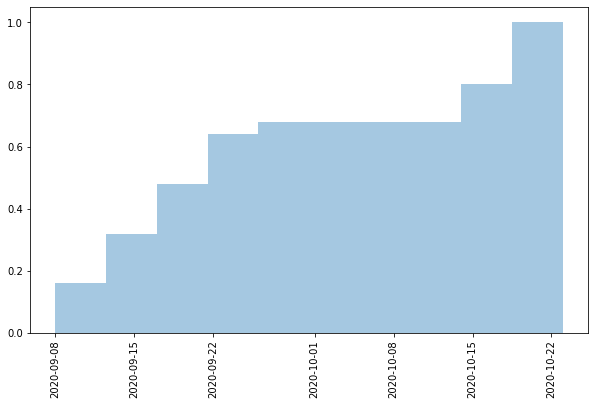

In [261]:
df_visual['Date'] = pd.to_datetime(df_visual['created_at']).dt.date
df_visual['counter'] = 1
date_time = df_visual.groupby('Date')['counter'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.hist(date_time['Date'], bins =10, density=True, cumulative=True, histtype='stepfilled', alpha=0.4)
plt.xticks(rotation=90)
plt.show()

In [211]:
from matplotlib.dates import date2num
from matplotlib.dates import num2date
import matplotlib.pyplot as plt

Prrinting the counts for histogram
 [4 4 4 4 1 0 0 0 3 5]
Sum of count is
 25
Printing Edges of bins 
 [737676.  737680.5 737685.  737689.5 737694.  737698.5 737703.  737707.5
 737712.  737716.5 737721. ]
CDF Is as followes
 [0.16 0.32 0.48 0.64 0.68 0.68 0.68 0.68 0.8  1.  ]
[datetime.datetime(2020, 9, 8, 0, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 9, 12, 12, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 9, 17, 0, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 9, 21, 12, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 9, 26, 0, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 9, 30, 12, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 10, 5, 0, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 10, 9, 12, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 10, 14, 0, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 10, 18, 12, 0, tzinfo=datetime.timezone.utc), datetime.datetime(2020, 10, 23, 0, 0

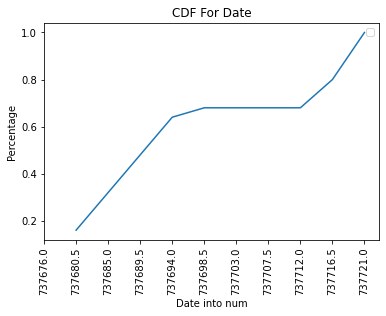

In [259]:
counts, bin_edges = np.histogram(date2num(date_time['Date']), bins=10,  density = False)
x_t = date2num(date_time['Date'])
print("Prrinting the counts for histogram\n",counts)
pdf = (counts) / (counts.sum())
print("Sum of count is\n",counts.sum())

print("Printing Edges of bins \n",bin_edges)
plt.figure()
cdf = np.cumsum(pdf)
print("CDF Is as followes\n",cdf)
plt.gca().legend(('Cdf'))
plt.title('CDF For Date')
plt.xlabel("Date into num")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:],cdf)
plt.xticks(rotation=90)
labels = num2date(bin_edges,tz=None)
print(labels)
plt.xticks(labels)
plt.show()

In [292]:
desired_width=320

pd.set_option('display.width', desired_width)
pd.set_option('max_colwidth',400)
pd.describe_option('max_colwidth')
pd.set_option('max_rows',9999)


pd.set_option('display.max_columns',20)

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [305]:
df_sent = df_visual.groupby(['sentiment','Date'])['counter'].sum().reset_index()
df_sent

,sentiment,Date,counter
0,negative,2020-09-08,10
1,negative,2020-09-09,9
2,negative,2020-09-10,15
3,negative,2020-09-12,3
4,negative,2020-09-13,4
5,negative,2020-09-14,10
6,negative,2020-09-15,33
7,negative,2020-09-16,8
8,negative,2020-09-17,8
9,negative,2020-09-18,7


In [306]:
p1 = df_sent[:25]
p2 = df_sent[25:50]
p3 = df_sent[50:]

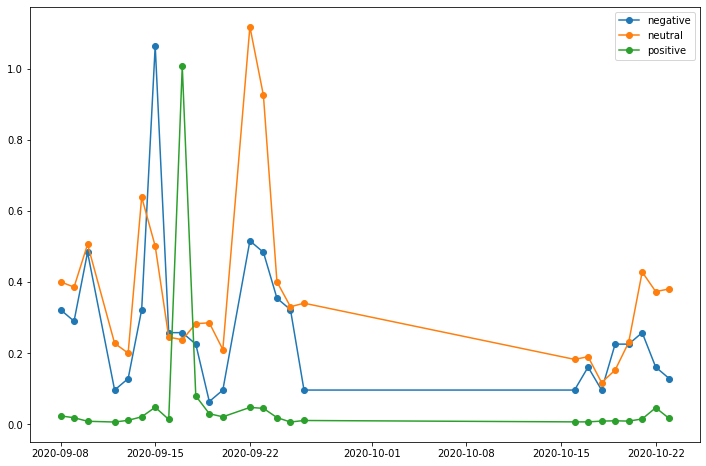

In [313]:
plt.figure(figsize=(12,8))
def norm(data):
  return (data)/(max(data)-min(data))
plt.plot(p1['Date'],norm(p1['counter']), marker='o',label='negative')
plt.plot(p2['Date'],norm(p2['counter']), marker='o',label='neutral')
plt.plot(p3['Date'],norm(p3['counter']), marker='o',label='positive')
plt.legend()
plt.show()

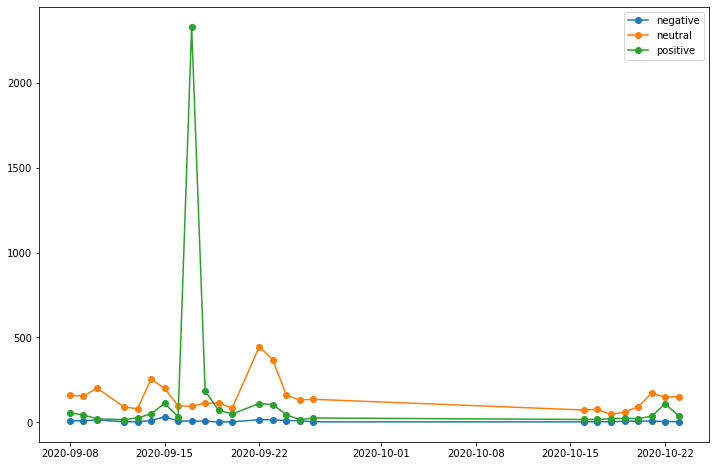

In [314]:
plt.figure(figsize=(12,8))
def norm(data):
  return (data)/(max(data)-min(data))
plt.plot(p1['Date'],(p1['counter']), marker='o',label='negative')
plt.plot(p2['Date'],(p2['counter']), marker='o',label='neutral')
plt.plot(p3['Date'],(p3['counter']), marker='o',label='positive')
plt.legend()
plt.show()